# Day 16 In-Class Assignment: Random Processes

### <p style="text-align: right;"> &#9989; Cesarine Graham.</p>


#### <p style="text-align: right;"> &#9989; Shaan Karim, Kinza Hasan, Allison Perez-Bermudez.</p>

## Goals of this assignment

The goals of this assignment are:

* Use a random-number generator to simulate the decay of an isotope
* Study the distributions created by a random walk in 1 and 2 dimensions


## Assignment instructions

Upload the assignment to Gradescope before noon on the day of the class.

------
# Part 1: Decay of a Radioisotope

The radioisotope $^{208}\text{Tl}$ (thallium-208) decays to stable $^{208}\text{P}b$ (lead-208) with a half-life of 3.053&nbsp;minutes.
Let's suppose we start with a sample of 1000 thallium atoms and simulate the decay of the atoms over time, mimicking the randomness of nature using random numbers.

On average we know that the number $N$ atoms in our sample will fall off exponentially over time according to the standard equation of radioactive decay

$$ N(t) = N(0) 2^{-t/\tau}, $$

where $\tau$ is the half-life.
The fraction of the atoms remaining after time $t$ is

$$ N(t)/N(0) = 2^{-t/\tau}. $$

The probability that any particular single atom has decayed is one minus this number

$$ p(t) = 1-  2 ^{-t/\tau}. $$

Below is the program to perform the calculation and make a plot of the numbers of decaying/remaining atoms as a function of time for 1000 seconds.
Fill in the missing code below:

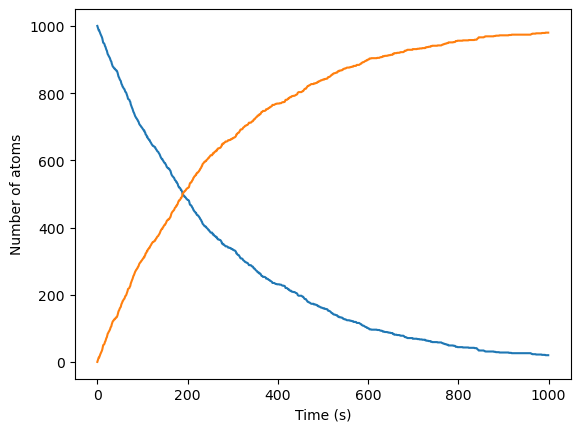

In [1]:
from random import random
from numpy import arange
from pylab import plot,xlabel,ylabel,show

# Constants
NTl = 1000             # Number of thallium atoms
NPb = 0                # Number of lead atoms
tau = 3.053*60         # Half life of thallium in seconds
h = 1.0                # Size of time-step in seconds
p = 1 - 2**(-h/tau)    # Probability of decay in one step
tmax = 1000            # Total time in seconds

# Lists of plot points
tpoints = arange(0.0,tmax,h)
Tlpoints = []
Pbpoints = []

# Main loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)

    # Calculate the number of atoms that decay
    decay = 0
    for i in range(NTl):
        if random() < p:       # random() returns a random number between 0 and 1
            decay += 1
    NTl -= decay
    NPb += decay

# Make the graph
plot(tpoints, Tlpoints, label="Tl")
plot(tpoints, Pbpoints, label="Pb")
xlabel("Time (s)")
ylabel("Number of atoms")
show()

-----------
# Part 2:   Random Walk

In this section, we will continue from the pre-class assignment to finish the 1D random-walk analysis, and then move on to the 2D random walk with your group mate.

## 2.0 Einstein diffusion relation

Einstein's prediction for Brownian motion in his molecular model is given in the "Einstein diffusion relation" (here, in 3 dimensions):

$$ \left\langle \left|\mathbf{r}(t)-\mathbf{r}(0)\right|^2\right\rangle = 6Dt, $$

where $r(t)$ is the position of a particle at time $t$, $D$ is the diffusion coefficient, and the angle brackets denote an average over an ensemble of measurements.

**What does this mean?** We measure the distance from the particle's initial position, $\mathbf{r}(0)$, which is $|\mathbf{r}(t) - \mathbf{r}(0)|$, over many different experiments and find that the mean squared distance (defined in the angle brackets above) increases linearly with time.
You might ask: _Is that so surprising?_
It is when you consider that Brown could not see the water molecules in his microscope, so the motion might be predicted to be given by $r = vt$, which predicts an increase in time of the squared distance of $t^2$.
Because the particle can reverse directions over and over, its distance from the origin increases more slowly as just $t$.
The slope is the diffusion coefficient.

## 2.1 One dimension

### 2.1.1
Check your pre-class code.
Copy the `step1d()` and the code from 2.4.
Test the code and make sure it runs without problems.
Compare your code with your groupmate, and make sure everyone in the group has correct code for this part before moving on.

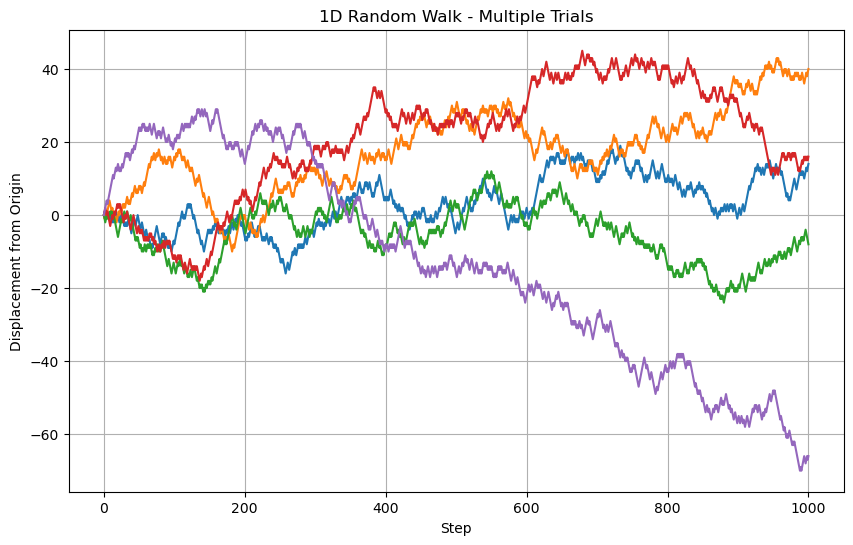

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random

def step1d():
    coin_flip = random.randint(0,1)             # use randint to give number between 0 and 1
    if coin_flip == 0:         # if coin_flip is 0 (for tail), and turn left (-1)
        step = -1
    elif coin_flip ==1:          # if coin_flip is 1 (for head), and turn right (+1)
        step = 1
    return step

# your code here
ntrials = 5             # Number of trials
nsteps = 1000           # Number of steps per trial
plt.figure(figsize=(10, 6))

for _ in range(ntrials):
    x = 0
    displacement = [x]
    for i in range(nsteps):
        x = x + step1d()
        displacement.append(x)
    plt.plot(range(nsteps + 1), displacement)

plt.xlabel('Step')
plt.ylabel('Displacement from Origin')
plt.title('1D Random Walk - Multiple Trials')
plt.grid(True)
plt.show()

### 2.1.2 Complete the 1D random-walk analysis

Once you have code that stores all of the final positions, calculate $\left\langle \left(r(t)-r(0)\right)^2 \right\rangle, $ which is the average squared distance of the walk.
What is $r(0)$ in this case?
(Note that we're keeping track of average squared distance, because that makes it easier to do the next part.)

Plot a histogram of the final distances.
You should get something that ends up looking like this:
https://drive.google.com/open?id=1Dl_VUq9G_DMBKOUfZ1g6O6SrJev3tcqD

_Hint: You may want to use a `numpy` array and append distances to it, then you can square the values in the array and compute the mean of those values using NumPy.
Alternatively, you can store the values in a list and convert them into a NumPy array later._

1005.336


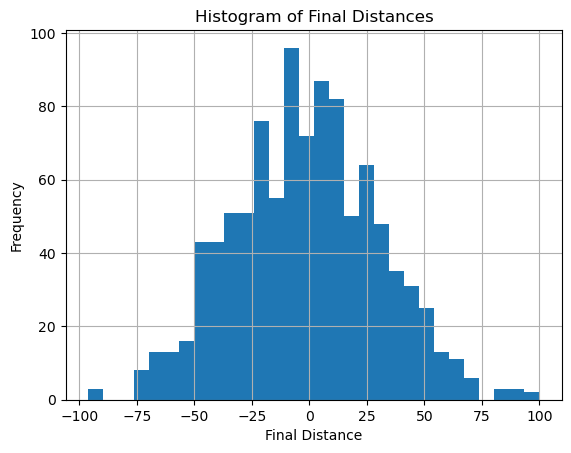

In [5]:
### fill in the missing code from 2.1

distances = []
for _ in range(1000):                            # how many total steps do I want to take?
    x = 0
    for _ in range(1000):
        x = x + step1d()
    distances.append(x)

distances = np.array(distances)
distances_squared = distances**2
avg_distance_sq = distances_squared.mean()
print(avg_distance_sq)

plt.hist(distances, bins=30)  # Plot histogram with 30 bins
plt.xlabel('Final Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Final Distances')
plt.grid(True)
plt.show()

### 2.1.3

We're almost ready for Einstein!
We need one more layer to our loop structure.
We want to see how far the particles go, on average, as a function of the number of steps (which is actually just a proxy for time, since the size of the time steps are all the same).
Extend the code you wrote above to get the average of the square of the final position at 10 different time points ($t \in \{100, 200, \ldots, 1000\}$), and save the results to a list.
Plot the results versus time below (remember to use axis labels).

You should get something that ends up looking like this:
https://drive.google.com/open?id=1UZEzsMn1_f47ka0kv0Miu9HnZj425GXR

In [12]:
# put your code here

avg_squared_final_positions = []

for t in range(100, 1100, 100):  # t in {100, 200, ..., 1000}
    distances = []
    for _ in range(1000):
        x = 0
        for _ in range(t):
            x = x + step1d()
        distances.append(x)

    distances = np.array(distances)
    distances_squared = distances**2
    avg_distance_sq = distances_squared.mean()
    avg_squared_final_positions.append(avg_distance_sq)

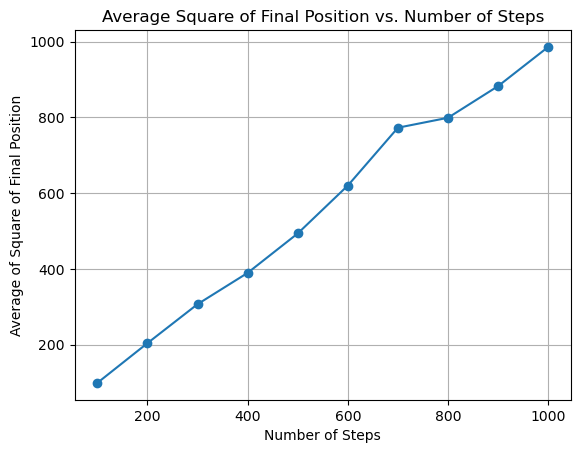

In [13]:
# make plot here

plt.plot(range(100, 1100, 100), avg_squared_final_positions, marker='o')
plt.xlabel('Number of Steps')
plt.ylabel('Average of Square of Final Position')
plt.title('Average Square of Final Position vs. Number of Steps')
plt.grid(True)
plt.show()

### 2.1.4
Look at the plot you've made.
Is this what you expect based on the Einstein diffusion equation?  Why or why not?

<font color='blue'>
Yes because it looks like the Einstein diffusion equation and it is mostly linear.


## 2.2 Two dimensions

Now, we're going to do the same thing, but in two dimensions.
This time, you will start at the origin, pick a random direction (up, down, left, or right), and take one step in that direction.
You will then randomly pick a new direction, take a step, and so on, for a total of $N_\text{step}$ steps.  

**Questions:**

* After $N_\text{step}$ random steps, how far are you from the origin?
* If you repeat this experiment $N_\text{trial}$ times, what will the distribution of distances from the origin be, and what is the mean distance that you go from the origin?  (Distance means the Euclidean norm of the displacement from the origin.)  Does the mean value differ from one dimension?
* For one trial, plot out the steps taken in the plane.  Does it look random?

### 2.2.1
In pairs, write a code in the space provided below to answer these questions.

_Hint: Start by modifying your coin-flip code to return an integer that is 0, 1, 2, or 3 (left, right, up, down)._


In [23]:
# put your code here

def step2d():
    direction = random.randint(0, 3)  # 0: left, 1: right, 2: up, 3: down
    if direction == 0:
        return (-1, 0)  # left
    elif direction == 1:
        return (1, 0)   # right
    elif direction == 2:
        return (0, 1)   # up
    else:
        return (0, -1)  # down

Nsteps = 10000  # Number of steps
x, y = 0, 0    # Initial position at the origin
positions = [(x, y)]  # List to store positions

for _ in range(Nsteps):
    dx, dy = step2d()
    x += dx
    y += dy
    positions.append((x, y))

# Convert the list of positions to NumPy array for easier manipulation
positions = np.array(positions)

### 2.2.2
Plot the horizontal and vertical values versus time, individually.

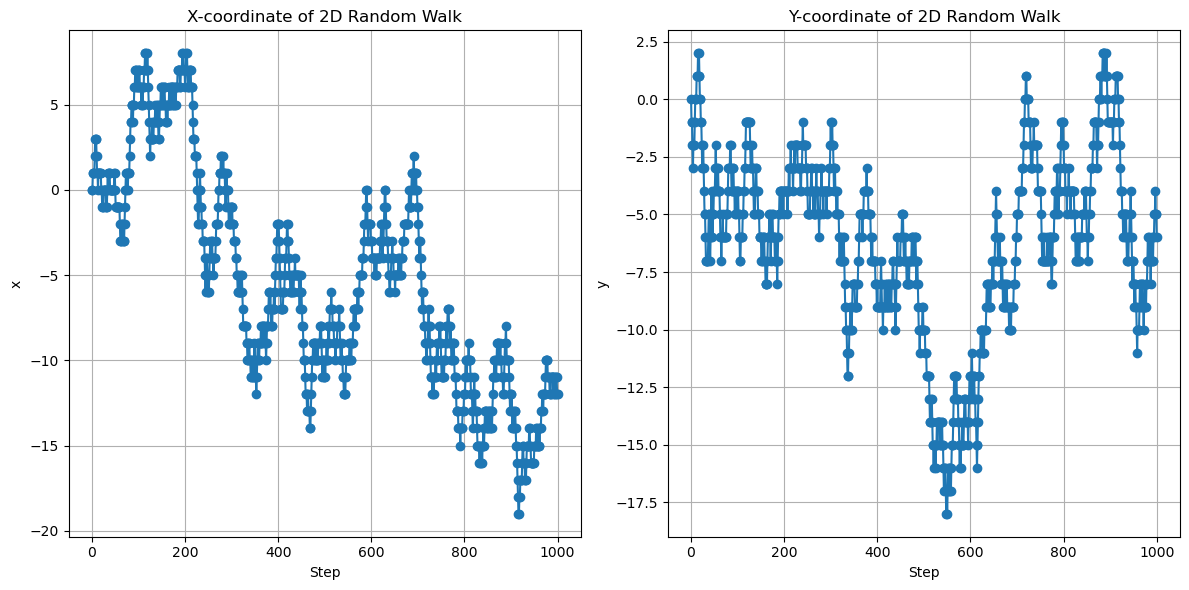

In [19]:
# put your code here

plt.figure(figsize=(12, 6))

# Plot x coordinate
plt.subplot(1, 2, 1)
plt.plot(range(Nsteps + 1), positions[:, 0], marker='o')
plt.xlabel('Step')
plt.ylabel('x')
plt.title('X-coordinate of 2D Random Walk')
plt.grid(True)

# Plot y coordinate
plt.subplot(1, 2, 2)
plt.plot(range(Nsteps + 1), positions[:, 1], marker='o')
plt.xlabel('Step')
plt.ylabel('y')
plt.title('Y-coordinate of 2D Random Walk')
plt.grid(True)

plt.tight_layout()
plt.show()

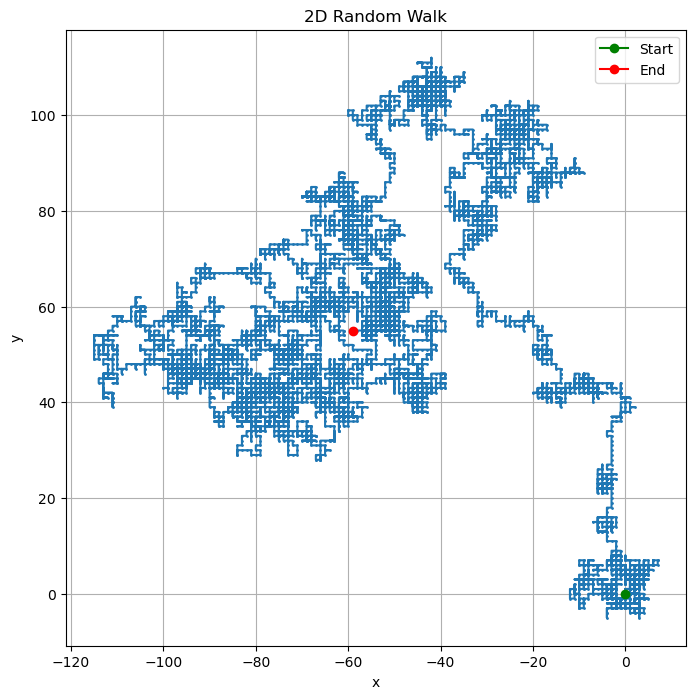

In [26]:
# Plot the steps taken in the plane
plt.figure(figsize=(8, 8))
plt.plot(positions[:, 0], positions[:, 1], marker='o',markersize=1)
plt.plot(positions[0, 0], positions[0, 1], marker='o', color='green', label='Start')
plt.plot(positions[-1, 0], positions[-1, 1], marker='o', color='red', label='End')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Random Walk')
plt.legend()
plt.grid(True)
plt.show()

### 2.2.3
How do these curves compare to the results of your 1D random walk?
<br>
<font color='blue'>
The curves for the x and y coordinates in the 2D random walk show similar behavior to the results of the 1D random walk, but with some differences. In the 2D random walk, the fluctuations in both x and y coordinates tend to be larger than in the 1D random walk. This is because in 2D, the walker can move in four directions (left, right, up, down), leading to larger potential changes in position compared to the 1D case.

### 2.2.4
Recall the Einstein equation for 3 dimensions:  $\left\langle\left|\mathbf{r}(t)-\mathbf{r}(0)\right|^2\right\rangle = 6Dt$.
Given that $r(0) = 0$ and that $r^2 = x^2 + y^2 + z^2$.
What do you think the corresponding Einstein equations are for 1D and 2D?

<font color='blue'>


For a 1D random walk, the Einstein equation would be:

$$ \left\langle \left| x(t) - x(0) \right|^2 \right\rangle = 2Dt,$$

where $ x(t) $ is the position along the x-axis at time $ t $, and $ D $ is the diffusion coefficient.

<br/>

For a 2D random walk, the Einstein equation would be:

$$\left\langle \left| \mathbf{r}(t) - \mathbf{r}(0) \right|^2 \right\rangle = 4Dt, $$

where $ \mathbf{r}(t) = (x(t), y(t)) $ is the position vector in the xy-plane at time $ t $, and $ D $ is the diffusion coefficient.